### Mnist分类任务：

- 网络基本构建与训练方法，常用函数解析

- torch.nn.functional模块

- nn.Module模块


### 读取Mnist数据集
- 会自动进行下载

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


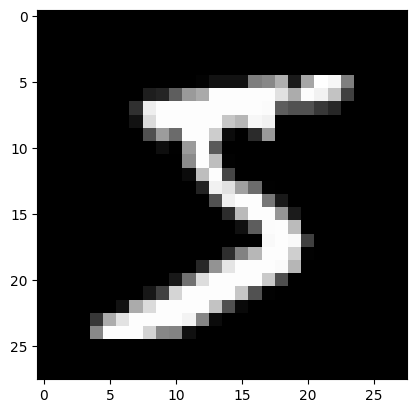

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

注意数据需转换成tensor才能参与后续建模训练


In [5]:
import torch
# map映射，将ndarray数组格式转成tensor映射
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
# n是样本得数量，c是像素点 784个像素点28*28
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
# 标签0-9
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


### torch.nn.functional 很多层和函数在这里都会见到

torch.nn.functional中有很多功能，后续会常用的。那什么时候使用nn.Module，什么时候使用nn.functional呢？一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情况nn.functional相对更简单一些

In [6]:
import torch.nn.functional as F

# nn.functional 适合学习测试，但是不适合用来训练
# 交叉熵损失
loss_func = F.cross_entropy

# 计算wx+b看有pytorch好不好用
def model(xb):
    return xb.mm(weights) + bias

快速理解交叉熵函数可以从以下几个角度来考虑：

1. 交叉熵函数可以用于衡量两个概率分布之间的差异。当两个分布完全一致时，交叉熵为0；当两个分布差异越大时，交叉熵的值越大。

2. 在分类任务中，交叉熵函数常用于衡量模型预测结果与真实标签之间的差异。通过最小化交叉熵函数，可以使模型的预测结果更接近真实标签，从而提高模型的性能。

3. 交叉熵函数中的对数运算可以有效地放大预测概率值之间的差异。当模型的预测概率与真实标签概率相差较大时，对数运算会使差异更加明显。

总的来说，交叉熵函数是一种常用的衡量概率分布差异的指标，特别适用于分类任务中的模型评估和优化。

在PyTorch中，`tensor.mm()`方法是用于执行两个矩阵的矩阵乘法（Matrix Multiplication）的函数。它是`torch.Tensor`类的方法，用于执行两个二维张量（矩阵）之间的矩阵乘法运算。

具体而言，`tensor.mm()`方法会将调用它的矩阵视为左矩阵，然后与作为参数传递给该方法的矩阵作为右矩阵，执行矩阵乘法运算。两个矩阵的维度必须满足矩阵乘法的规则，即左矩阵的列数必须等于右矩阵的行数。

例如，假设我们有两个矩阵A和B，可以使用`tensor.mm()`方法计算它们的乘积C：

```python
import torch

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

C = A.mm(B)
```

上述代码中，矩阵A是一个2x2的矩阵，矩阵B也是一个2x2的矩阵。通过调用`A.mm(B)`，我们得到了它们的乘积矩阵C，结果为：

```
tensor([[19, 22],
        [43, 50]])
```

注意，`tensor.mm()`方法仅适用于二维张量（矩阵）之间的矩阵乘法运算。对于更高维度的张量，可以使用`torch.matmul()`函数执行张量乘法运算。

这里batch是64个样本，那么每个样本784个维度,10个类别
这里如果只有一层神经网络
x.mm（w）
矩阵乘法，那么w得维度就是784*10
b就是10个值
w需要更新，那么就需要梯度得所以required_grad = true
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 


In [10]:
# 这里就是对w做随机得初始化
torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 

tensor([[-0.1831,  0.2433,  1.6987,  ...,  0.5959, -1.7763, -0.2701],
        [ 0.0270, -0.4093,  0.7178,  ..., -1.2376,  0.7601, -1.1901],
        [-1.3166, -0.3185,  0.2489,  ...,  1.2599,  0.0351,  0.5857],
        ...,
        [ 1.3949, -0.5380,  1.2432,  ..., -1.4323, -0.9249,  0.9814],
        [ 1.6295, -0.0851, -1.4690,  ...,  0.8231,  0.3279,  2.0194],
        [-0.1556,  0.7607, -0.3104,  ...,  0.8845,  0.7100,  0.9098]],
       requires_grad=True)

In [13]:
# batch size这里设置一次训练多少样本
bs = 64
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 

# b对结果得影响非常小得
bias = torch.zeros(10, requires_grad=True)
#计算损失函数需要传递两个值，一个是预测值，一个是预测值得结果
print(loss_func(model(xb), yb))

tensor(14.1397, grad_fn=<NllLossBackward0>)


### 创建一个model来更简化代码

##### 这里采用全连接层

那么网络结构
F = wx+b 每一层都是wx+b

输入层得维度 batch * 784
隐藏层 如果我们想要128个类别，那么隐藏层就是 784*128得矩阵，b1就是128个值
同理w2 128 * 10 得维度，b2 10个值
输出层 输出层也是固定得，如果维度是10分类，那么最后就是10

分类：
我会得到样本中各个类别得概率，10分类，那么就会得到10个类别中得概率，取其中概率最大得

- 必须继承nn.Module且在其构造函数中需调用nn.Module的构造函数
- 无需写反向传播函数，nn.Module能够利用autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters()或者parameters()返回迭代器

<img src="./img/神经网络传播.png" alt="FAO" width="790">

In [23]:
from torch import nn

# 定义一个类，这个必须继承nn.Module
class Mnist_NN(nn.Module):
    # 这两个函数非常关键一定指定好
    # 建立这个模型需要的所有的东西，和做饭一样，准备好食材，构建网络执行什么计算，什么网络都指定好
    # 写出神经网络是怎么设计的，每一层输入是什么，输出是什么
    def __init__(self):
        super().__init__()
        # 这里输入784个点，输出128个特征 [这里封装好了，w和b的维度不需要自己计算了]
        self.hidden1 = nn.Linear(784, 128)
        # 同上再增加一层
        self.hidden2 = nn.Linear(128, 256)
        # 最后一层输出10个类别的概率，所以就是256，10
        # 神经网络中需要drop out
        # 神经网络中，神经元个数特别多，那么训练中特别容易过拟合，需要随机杀死神经元
        # 班级里30人，随机请出去一些，保留15个，那么一天上8堂课，那么每个人都会随机被训练到一些
        self.out  = nn.Linear(256, 10)
        # 按照多少百分比杀死这个东西，一般50%比较常见
        self.dropout = nn.Dropout(0.5)

    # 上面只是定义好，军马未动，粮草先行
    # torch 前向传播需要自己做定义，反向传播自动的，一行代码就实现了
    # 这里输入batch*特征 这里就是 [64*784]那么这个x进来之后每一步都做了什么事情是需要自己定义的
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        # 基本上每一个全连接层都需要加一个dropout,卷积层一般不加
        x = self.dropout(x)
         # 基本上每一个全连接层都需要加一个dropout,卷积层一般不加
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        # 输出层不用加
        x = self.out(x)
        return x
        

In [25]:
# 打印查看下自己的网络是啥
net = Mnist_NN()
print(net)


Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


可以打印我们定义好名字里的权重和偏置项

In [27]:
# 这里我们没有定义权重参数，pytorch中给自己做了。模型给做了
# name是指那一层，上面自己定义的hidden1，hidden2
# parameter就是权重参数
for name, parameter in net.named_parameters():
    print(name, parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[ 0.0124,  0.0165, -0.0281,  ...,  0.0338,  0.0193, -0.0163],
        [-0.0327,  0.0007, -0.0132,  ...,  0.0350,  0.0093,  0.0248],
        [ 0.0266,  0.0269,  0.0140,  ..., -0.0276, -0.0145, -0.0350],
        ...,
        [-0.0164, -0.0137,  0.0041,  ..., -0.0107,  0.0196, -0.0092],
        [-0.0227, -0.0028,  0.0115,  ..., -0.0055,  0.0187, -0.0095],
        [ 0.0187,  0.0300, -0.0013,  ..., -0.0024,  0.0333,  0.0351]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([-0.0035, -0.0050, -0.0022,  0.0338,  0.0308,  0.0242,  0.0087, -0.0019,
        -0.0222, -0.0281, -0.0320, -0.0238,  0.0019, -0.0037,  0.0145, -0.0357,
         0.0181, -0.0250, -0.0008,  0.0128, -0.0111, -0.0241,  0.0087, -0.0250,
         0.0140, -0.0127,  0.0292, -0.0330,  0.0033, -0.0037, -0.0003, -0.0276,
        -0.0231,  0.0158,  0.0192,  0.0255,  0.0294,  0.0166, -0.0121,  0.0294,
         0.0326,  0.0339,  0.0186, -0.0255, 

# 上面构建神经网络
# 下面定义数据集

### 使用TensorDataset和DataLoader来简化

dataLoader的理解
数据向GPU中传递，64个64个数据作为batchsize大小的包进行传递，那么dataLoader就是给数据打包用的

In [28]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# batch_size= 打包的数据大小，shuffle 洗牌
#训练的时候需要打乱顺序，但是validation验证机不会更新参数的，不用shuffle，从哪里做题都可以，并且不需要batch_size=bs*几都可以
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

#需要训练集和验证集
valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [29]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

- 一般在训练模型时加上model.train()，这样会正常使用Batch Normalization和 Dropout
- 测试的时候一般选择model.eval()，这样就不会使用Batch Normalization和 Dropout

# 下面进行训练操作

In [46]:
import numpy as np

# steps 整个数据集迭代多少次
# model上面我们自己定义的网络模型
# loss_func损失函数
# opt 优化器，梯度下降
# train_dl,valida_dl 我们打包的数据
def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    # 外边的这个steps 就时epoch的意思
    # 数据量1000个，那么每次batch100个数据
    # 那么epoch是迭代多少次可以训练完成这些数据，那么需要迭代100次，一次迭代多少个数据是batch
    for step in range(steps):
        # model两个模式一个训练模式，一个验证模式
        # 训练模式需要更新权重参数，w和b
        model.train()
        # 这里的parameter就是上面封装好的dataloader
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        # 验证模式，这里没有梯度了，不更新权重参数，只要得到一个答案就可以了
        model.eval()
        with torch.no_grad():
            # 这里考试，所以需要返回训练的损失
            # 这里的nums虽然我们是64个一组batch来训练的，但是并不是每次都一定返回64，比如最后一次可能剩下不到64个数，就不会返回64
            losses, nums = zip(
                # 这里就得到了每一组batch的损失
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        # 这里计算平均的损失 / 训练次数 【总损失=每次批次损失的值*样本的个数】
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('当前step:'+str(step), '验证集损失：'+str(val_loss))

In [57]:
# 优化器
from torch import optim
def get_model():
    model = Mnist_NN()
    # SGD梯度下降，所有的参数都更新，那么这里model。parameters就是每一层的w，b[w1,b1和w2,b2],lr是学习率，刚开始都尽可能小一点，迭代次数多一些
    # Adam优化器 可以看到梯度下降的非常的块效果更好
    return model, optim.Adam(model.parameters(), lr=0.001)

In [36]:
model.parameters

<bound method Module.parameters of Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)>

In [48]:
# 1. 计算损失
# 2. 更新权重参数
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:

        # 反向传播计算梯度
        loss.backward()
        # 沿着梯度进行更新
        opt.step()
        # torch 每次迭代的更新会做累加 这里torch默认的更新会将这次迭代的w和上一次迭代用的梯度值累加。。。就是课上讲的防止梯度消失的方法
        # 这里避免每次迭代的累加，每次都设置上次梯度迭代时0，0+这次迭代=这次迭代的值
        # 默认这次更新的梯度和之前更新的梯度都没有关系的，所以默认都加上zero_grad
        # 更新之后将当前的梯度清0，然后继续做
        opt.zero_grad()

    #这样就执行了一次更新，执行之后返回loss就可以了
    # 这里计算样本的平均损失，所以需要除以样本的总数
    return loss.item(), len(xb)

### 三行搞定！

In [49]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, train_dl, valid_dl)

当前step:0 验证集损失：2.276843878555298
当前step:1 验证集损失：2.2428342697143555
当前step:2 验证集损失：2.194053916931152
当前step:3 验证集损失：2.1240880840301513
当前step:4 验证集损失：2.0282446739196778
当前step:5 验证集损失：1.9006445817947388
当前step:6 验证集损失：1.7352683010101317
当前step:7 验证集损失：1.5384176153182982
当前step:8 验证集损失：1.3361773078918457
当前step:9 验证集损失：1.1625820545196532
当前step:10 验证集损失：1.025788812828064
当前step:11 验证集损失：0.9223114345550537
当前step:12 验证集损失：0.8414798892974854
当前step:13 验证集损失：0.777689347743988
当前step:14 验证集损失：0.7258062195777893
当前step:15 验证集损失：0.6811079141616821
当前step:16 验证集损失：0.644171739578247
当前step:17 验证集损失：0.6129091912269592
当前step:18 验证集损失：0.584997200679779
当前step:19 验证集损失：0.5606654470443726
当前step:20 验证集损失：0.5392741546154022
当前step:21 验证集损失：0.5197537083148956
当前step:22 验证集损失：0.502247228527069
当前step:23 验证集损失：0.4870872275829315
当前step:24 验证集损失：0.47258752207756044


# zip的用法 打包，配对的意思

In [43]:
a=[1,2,3]
b=[4,5,6]
zipped =zip(a,b)

In [39]:
zipped

In [40]:
print(list(zipped))

[(1, 4), (2, 5), (3, 6)]


In [45]:
a2,b2 = zip(*zip(a,b))
print(a2)
print(b2)

(1, 2, 3)
(4, 5, 6)


In [55]:
# 计算准确率
correct = 0
total = 0
for xb,yb in valid_dl:
    outputs = model(xb)
    
    # outputs返回每一个样本的十个类别的输出值【这个时候还不是概率呢】
    # print(outputs)

    # torch.max 后面的1是告诉沿着哪个维度取最大，对每个样本的值最大，0是比较不同样本之间的东西了【128*10】的数据，对10这个维度来比较，所以是1

    # max返回第一个元素，最大的值是什么，这个值所在的位置是什么
    _,predicted = torch.max(outputs.data,1)
    total += yb.size(0)
    correct += (predicted == yb).sum().item()

print(f'Accuracy of the network on the 10000 test images: %d %%',(100*correct)/total)

Accuracy of the network on the 10000 test images: %d %% 87.84
